## Fake News Detection Model using Machine Learning

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
# Load dataset
df = pd.read_csv(r"C:\Users\srira\Downloads\Brainwave Matrix Internship\Datasets Task 1\news.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


In [6]:
# Checking the data
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [7]:
# Split dataset
X = df['text']
y = df['label']  # 'FAKE' or 'REAL'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english")
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [9]:
# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

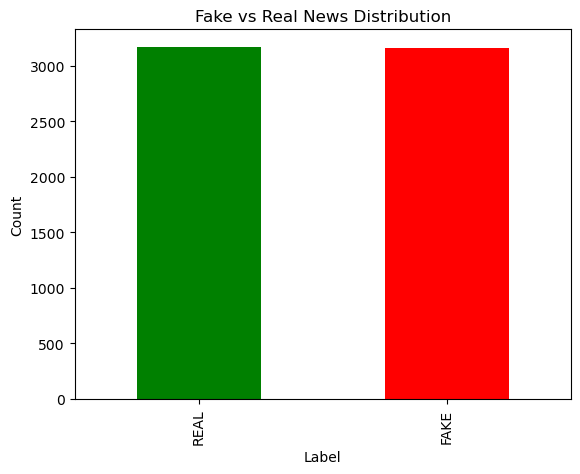

In [21]:
# Bar Graph: Fake vs Real News Distribution
df['label'].value_counts().plot(kind='bar', color=['green', 'red'], title='Fake vs Real News Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
# Training with CountVectorizer
nb_count = MultinomialNB()
nb_count.fit(count_train, y_train)
pred_count = nb_count.predict(count_test)

In [12]:
# Training with TfidfVectorizer
nb_tfidf = MultinomialNB()
nb_tfidf.fit(tfidf_train, y_train)
pred_tfidf = nb_tfidf.predict(tfidf_test)

In [13]:
# Accuracy Scores
print(f"CountVectorizer Accuracy: {accuracy_score(y_test, pred_count):.2f}")
print(f"TfidfVectorizer Accuracy: {accuracy_score(y_test, pred_tfidf):.2f}")

CountVectorizer Accuracy: 0.89
TfidfVectorizer Accuracy: 0.82


In [14]:
# Classification Report (Tfidf)
print("\nClassification Report (Tfidf):\n", classification_report(y_test, pred_tfidf))


Classification Report (Tfidf):
               precision    recall  f1-score   support

        FAKE       0.97      0.66      0.78      1071
        REAL       0.73      0.98      0.84      1020

    accuracy                           0.82      2091
   macro avg       0.85      0.82      0.81      2091
weighted avg       0.86      0.82      0.81      2091



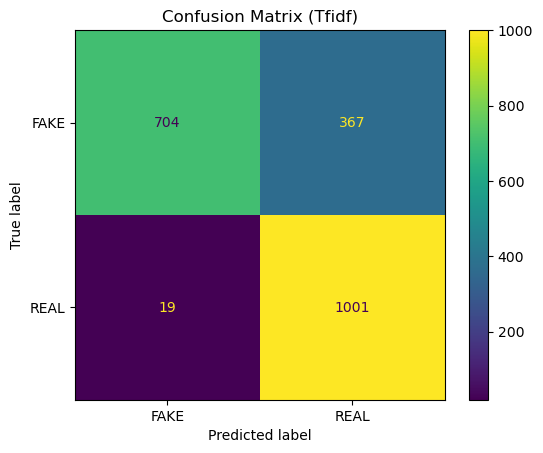

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, pred_tfidf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_tfidf.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix (Tfidf)")
plt.show()

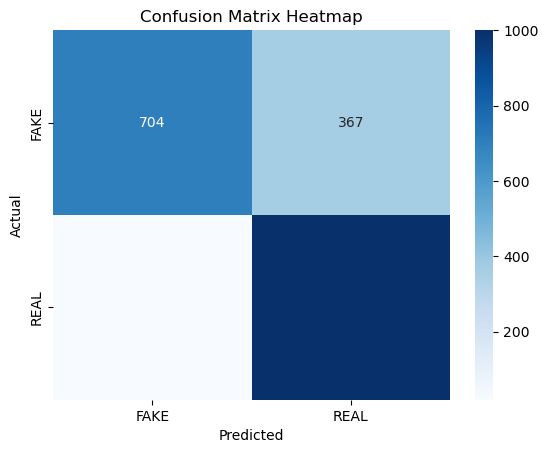

In [16]:
# Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_tfidf.classes_, yticklabels=nb_tfidf.classes_)
plt.title("Confusion Matrix Heatmap")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

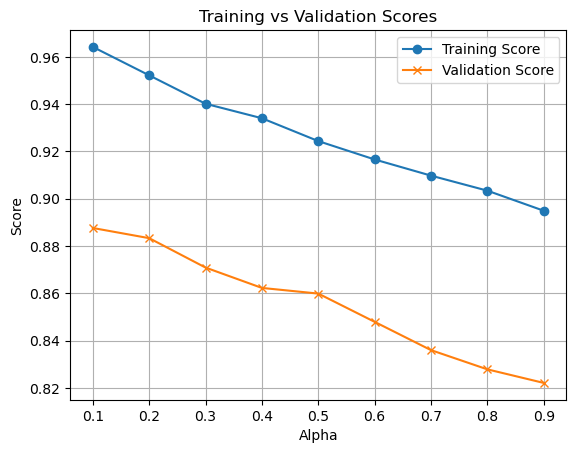

In [17]:
# Training vs Validation Loss (Alpha Tuning)
alphas = np.arange(0.1, 1.0, 0.1)
training_scores = []
validation_scores = []
for alpha in alphas:
    nb_tfidf = MultinomialNB(alpha=alpha)
    nb_tfidf.fit(tfidf_train, y_train)
    training_scores.append(nb_tfidf.score(tfidf_train, y_train))
    validation_scores.append(nb_tfidf.score(tfidf_test, y_test))
plt.plot(alphas, training_scores, label='Training Score', marker='o')
plt.plot(alphas, validation_scores, label='Validation Score', marker='x')
plt.title("Training vs Validation Scores")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

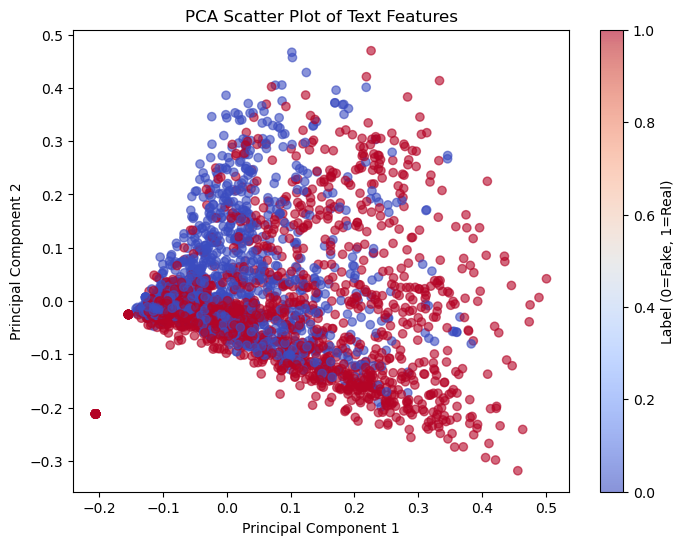

In [18]:
# Scatter Plot using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_train.toarray())
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=y_train.map({'FAKE': 0, 'REAL': 1}), cmap="coolwarm", alpha=0.6)
plt.title("PCA Scatter Plot of Text Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Label (0=Fake, 1=Real)")
plt.show()